<a href="https://colab.research.google.com/github/Thundastormgod/AI-webscraping/blob/main/West_Midlands_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Load the CSV file (ensure your CSV file is uploaded to Colab or available via a path)
df = pd.read_csv('/content/west-midlands-police-crime.csv')
print(df)

                                                 Crime ID     Date  \
0                                                     NaN  2023-09   
1       5c3297244aacaf609b2703afd92b29e9086ad8c76f2961...  2023-09   
2       c87708b2974725eac8b34b75432dcf39405a66ddff969a...  2023-09   
3       161c677d641aba05e4a1c0e39923f3820ee5aeaf4966ba...  2023-09   
4       b93c06ae7f5efc21f968158dbd1a7d0a8a6c39d0bfab40...  2023-09   
...                                                   ...      ...   
247396  4fe08983564304827cd6bb72e0d93190b20150a60e2492...  2024-12   
247397  656491bd78c39e4131c6f409327d1fffea5cb531573150...  2024-12   
247398  002ffe6347a6b3c662b630626a0be137372e9c47daedf7...  2024-12   
247399  5792254d2ee458f9835a08e80392dbd304f399a009ffe3...  2024-12   
247400  98fa46802a00ed2b7078de95bd98fd467ed0ddffb97714...  2024-12   

                          Crime type  \
0              Anti-social behaviour   
1                        Other theft   
2       Violence and sexual offences   

In [26]:
# Count total NaNs in the DataFrame
total_nan_count = df.isnull().sum().sum()
print("Total NaN count:", total_nan_count)


Total NaN count: 144278


In [36]:

# Check the number of missing values in each column
print("Missing values before imputation:\n", df.isnull().sum())

# If the missing counts seem unusually high, verify if your CSV has extra header rows
# Uncomment the following lines if needed to inspect the first few rows:
# print(df.head(20))
# print(df.tail(20))

# Convert the 'Date' column to datetime, if possible
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# For critical columns like 'Date', drop rows with missing values
df = df.dropna(subset=['Date'])

# For categorical columns, fill missing values with 'Unknown'
categorical_cols = [
    'Crime ID', 'Crime type', 'Last outcome category',
    'Location', 'LSOA code', 'LSOA name', 'geopoint',
    'Ward Code', 'Ward Name', 'Constituency Code', 'Constituency Name'
]
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

# For numeric columns (Longitude and Latitude), fill missing values with the median value
numeric_cols = ['Longitude', 'Latitude']
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Check missing values after imputation
print("\nMissing values after imputation:\n", df.isnull().sum())
df = df.dropna(subset=['Date'])

Missing values before imputation:
 Crime ID                 22387
Date                      8292
Crime type                8292
Last outcome category    22387
Longitude                 8292
Latitude                  8292
Location                  8292
LSOA code                 8292
LSOA name                 8292
geopoint                  8292
Ward Code                 8292
Ward Name                 8292
Constituency Code         8292
Constituency Name         8292
dtype: int64

Missing values after imputation:
 Crime ID                 0
Date                     0
Crime type               0
Last outcome category    0
Longitude                0
Latitude                 0
Location                 0
LSOA code                0
LSOA name                0
geopoint                 0
Ward Code                0
Ward Name                0
Constituency Code        0
Constituency Name        0
dtype: int64


In [39]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.day_name()



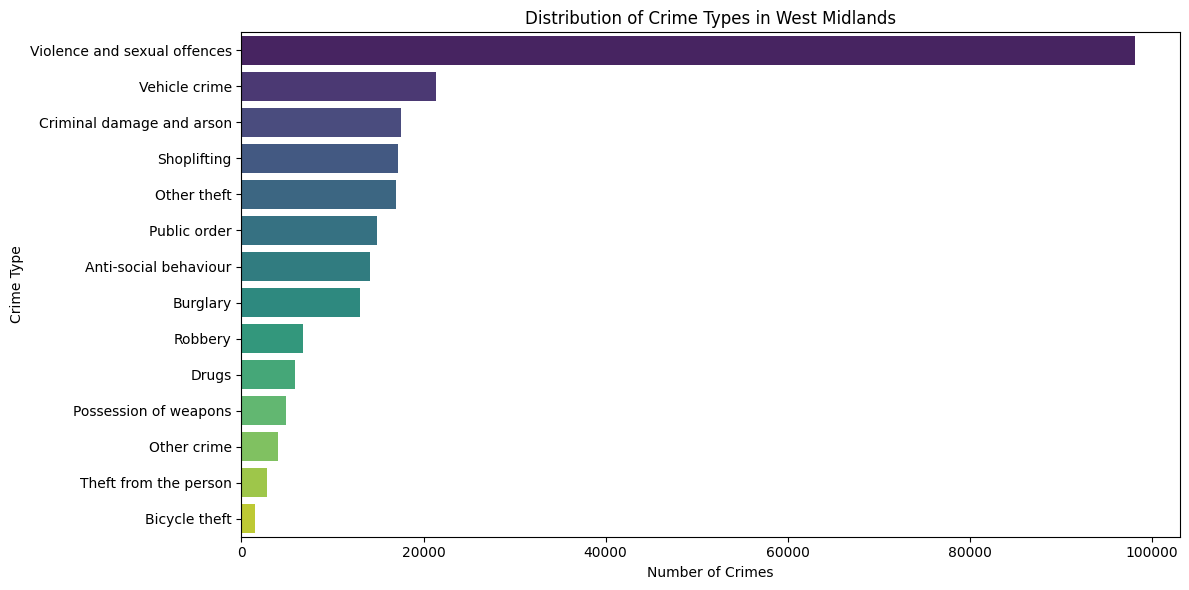

In [40]:
plt.figure(figsize=(12,6))
order = df['Crime type'].value_counts().index
sns.countplot(y='Crime type', data=df, order=order, palette='viridis')
plt.title('Distribution of Crime Types in West Midlands')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()

In [41]:
# Top 5 most frequent crime types
crime_counts = df['Crime type'].value_counts()
print("\nTop 5 Crime Types:")
print(crime_counts.head(5))


Top 5 Crime Types:
Crime type
Violence and sexual offences    98172
Vehicle crime                   21371
Criminal damage and arson       17574
Shoplifting                     17162
Other theft                     16977
Name: count, dtype: int64


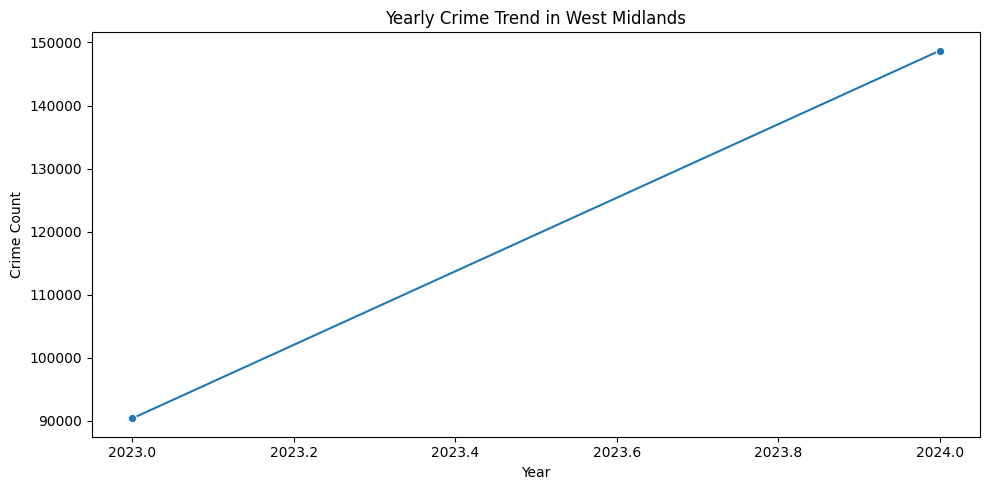

In [46]:
# Crimes per Year
yearly_counts = df.groupby('Year').size().reset_index(name='Crime_Count')
plt.figure(figsize=(10,5))
sns.lineplot(data=yearly_counts, x='Year', y='Crime_Count', marker='o')
plt.title('Yearly Crime Trend in West Midlands')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.tight_layout()
plt.show()

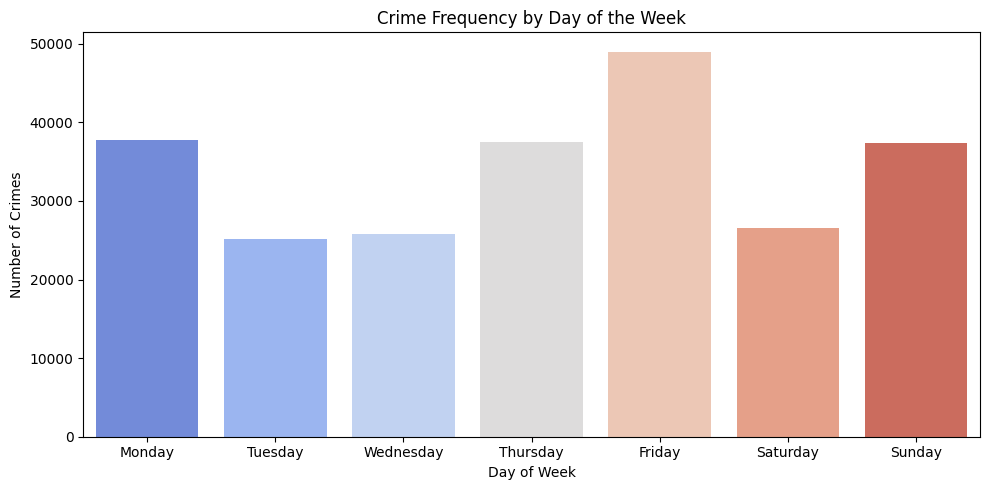

In [47]:
# Crimes by Day of the Week
plt.figure(figsize=(10,5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='Day_of_Week', data=df, order=order, palette='coolwarm')
plt.title('Crime Frequency by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()


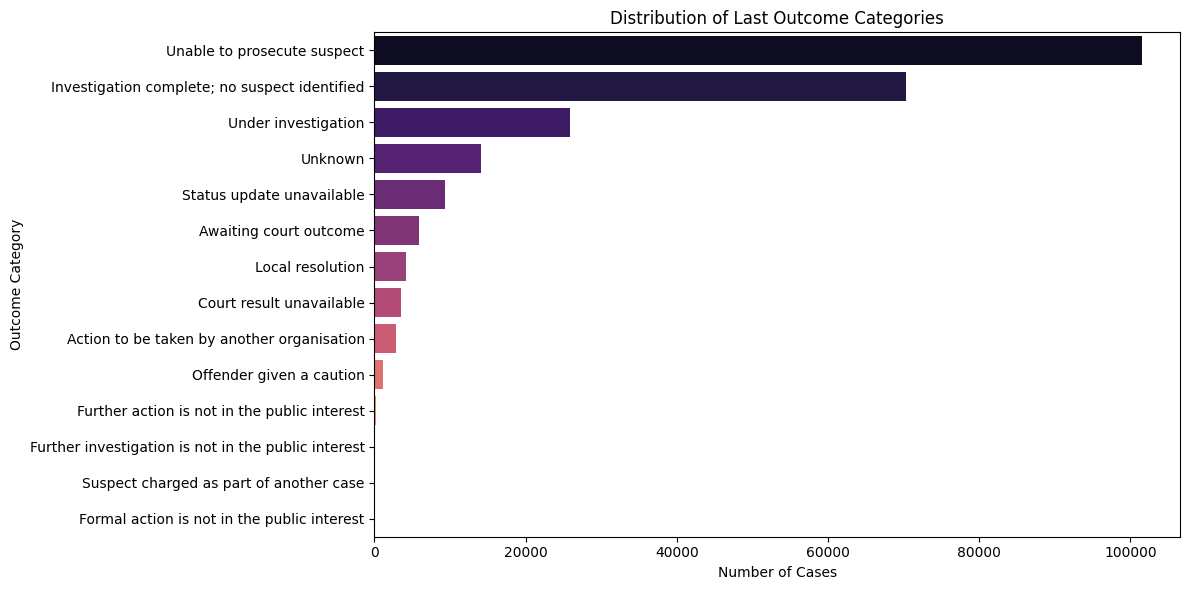

In [49]:
# Story 4: Outcome Analysis
# ---------------------------------------
plt.figure(figsize=(12,6))
order = df['Last outcome category'].value_counts().index
sns.countplot(y='Last outcome category', data=df, order=order, palette='magma')
plt.title('Distribution of Last Outcome Categories')
plt.xlabel('Number of Cases')
plt.ylabel('Outcome Category')
plt.tight_layout()
plt.show()

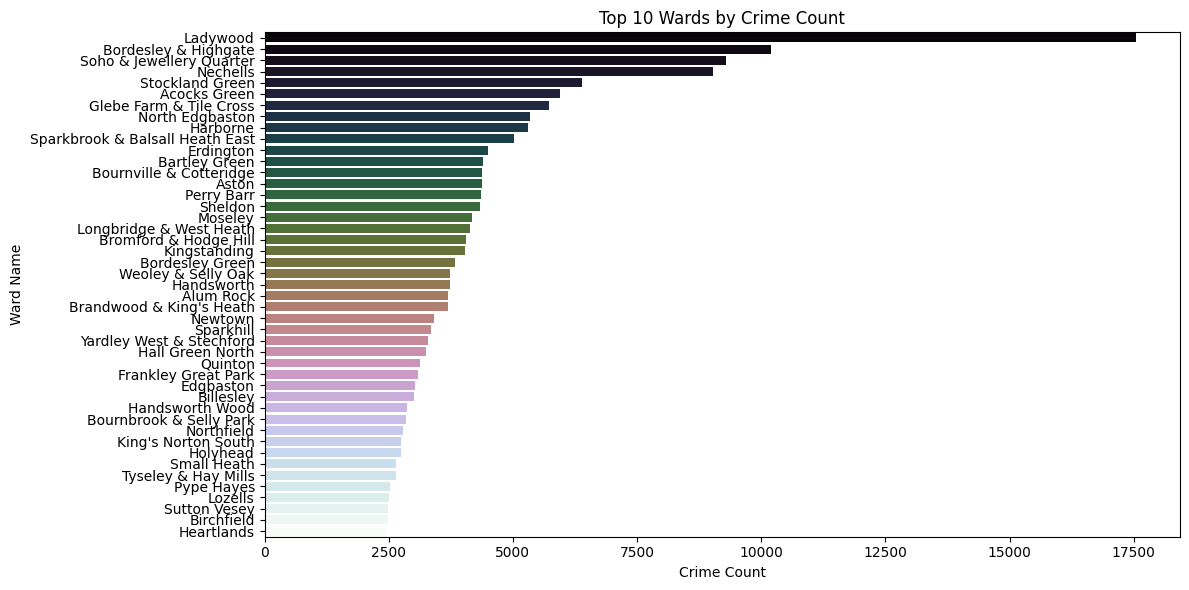

In [54]:
# Story 5: Crime Distribution by Ward
# ---------------------------------------
plt.figure(figsize=(12,6))
ward_counts = df['Ward Name'].value_counts().head(45)
sns.barplot(x=ward_counts.values, y=ward_counts.index, palette='cubehelix')
plt.title('Top 10 Wards by Crime Count')
plt.xlabel('Crime Count')
plt.ylabel('Ward Name')
plt.tight_layout()
plt.show()